<a href="https://colab.research.google.com/github/akshit7165/Minor-Project-Lane-Obj-Detection/blob/main/lane_object_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from queue import Queue

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3473408/45929032 bytes (7.6%)7004160/45929032 bytes (15.2%)10518528/45929032 bytes (22.9%)13934592/45929032 bytes (30.3%)17244160/45929032 bytes (37.5%)20701184/45929032 bytes (45.1%)24346624/45929032 bytes (53.0%)27533312/45929032 bytes (59.9%)30957568/45929032 bytes (67.4%)34529280/45929032 bytes (75.2%)37937152/45929032 bytes (82.6%)41402368/45929032 bytes (90.1%)

In [ ]:
%matplotlib inline

In [ ]:
f,axes= plt.subplots(4,5, figsize=(24,9))
row=0
col=0
distorted=[]
print("Distorted Chess Board Images")
for i in range(20):
    image= cv2.imread("/content/project/camera_cal/calibration"+str(i+1)+".jpg")
    
    distorted.append(image)
    axes[row,col].imshow(image)
    col+=1
    if(col==5):
        col=0
        row+=1
    

Distorted Chess Board Images


Corners plotted Images


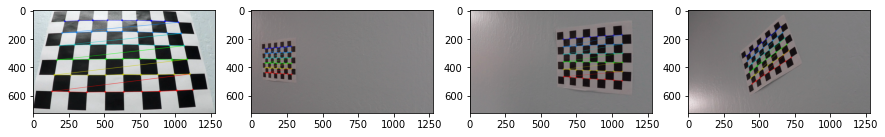

In [ ]:
f,axes= plt.subplots(1,4, figsize=(15,15))
print("Corners plotted Images")
row=0
nx=9
ny=6
objpoints=[]
imgpoints=[]
objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for image in distorted:
    
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, corners= cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if(ret):
        objpoints.append(objp)
        imgpoints.append(corners)
        if row>3:
            continue
        cv2.drawChessboardCorners(image,(nx,ny), corners, ret)
        axes[row].imshow(image)
        row+=1


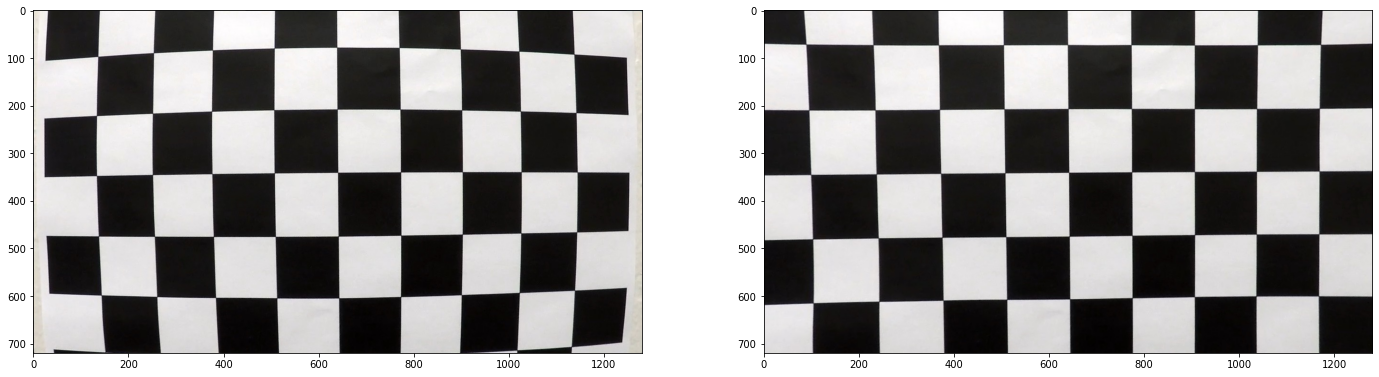

In [ ]:
image_test= cv2.cvtColor(cv2.imread("/content/project/camera_cal/calibration1.jpg"),cv2.COLOR_BGR2RGB)
y=image_test.shape[0]
x=image_test.shape[1]
_,mtx,dist,_,_= cv2.calibrateCamera(objpoints, imgpoints,(y,x),None,None)
undistorted_image= cv2.undistort(image_test,mtx,dist, None, mtx)
f,axes= plt.subplots(1,2, figsize=(24,9))
axes[0].imshow(image_test)
axes[1].imshow(undistorted_image)

In [ ]:
image_test1= cv2.imread("/content/project/test_img/straight_lines1.jpg")
image_test2= cv2.imread("/content/project/test_img/1.jpg")
image_test3= cv2.imread("/content/project/test_img/2.jpg")
image_test4= cv2.imread("/content/project/test_img/3.jpg")
image_test5= cv2.imread("/content/project/test_img/5.jpg")
image_test6= cv2.imread("/content/project/test_img/6.jpg")
image_test7= cv2.imread("/content/project/test_img/7.jpg")

test_images=[image_test1,image_test2,image_test3,image_test4,image_test5,image_test6,image_test7]
row=0
f,axes= plt.subplots(len(test_images),2, figsize=(20,20))
f.subplots_adjust(hspace=0.5)
print("Distortion correction on test images")
def undistort(img):
    return cv2.undistort(img,mtx,dist, None, mtx)

for image in test_images:
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].set_title('Original Image '+str(row+1))
    axes[row,0].imshow(image)
    undistorted_image= undistort(image)
    axes[row,1].imshow(undistorted_image)
    axes[row,1].set_title('Undistorted')
    row+=1


Distortion correction on test images


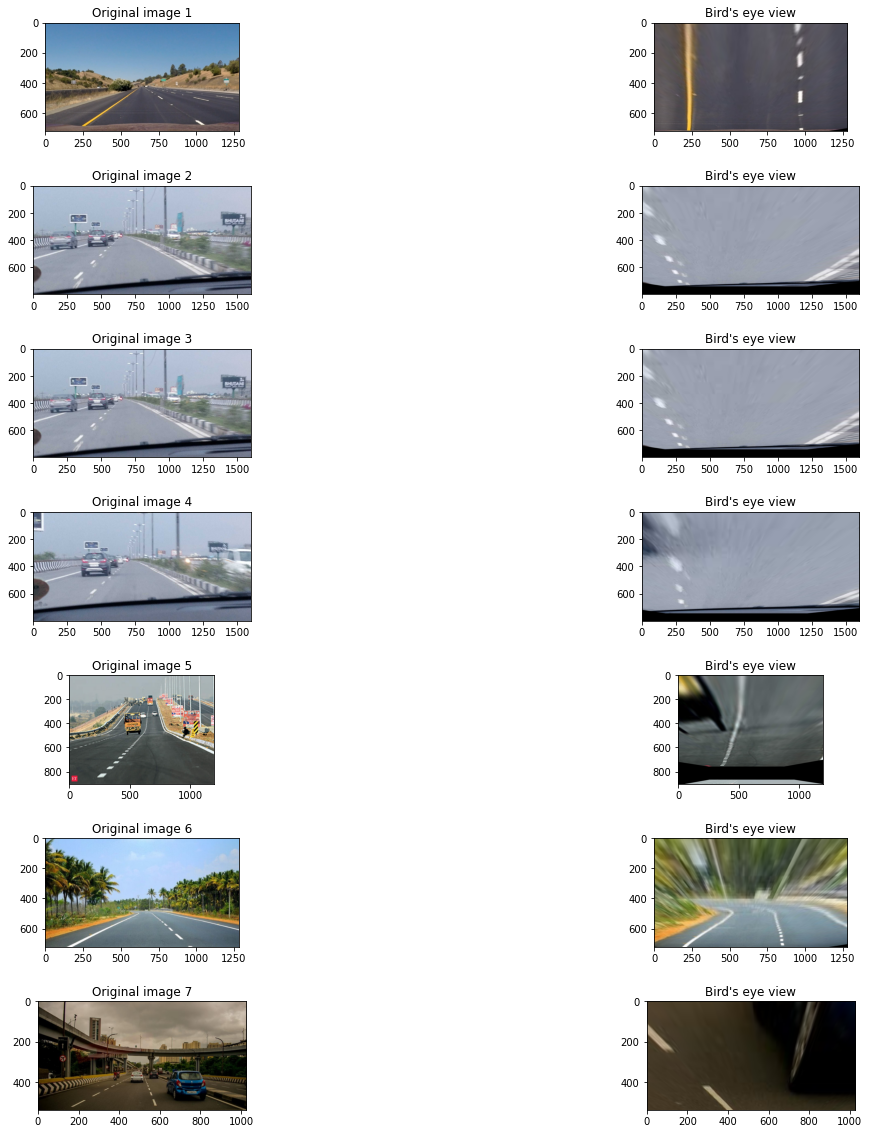

In [ ]:
offset=200
height, width= image_test1.shape[0], image_test1.shape[1]
src=np.float32([(593,450),(700,450),(1200,700),(200,700)])
dst=np.float32([(offset,0),(width-offset,0),(width-offset,height),(offset,height)])
def warp_image(img):
    img_size = (img.shape[1], img.shape[0])
    M= cv2.getPerspectiveTransform(src, dst) 
    inv= cv2.getPerspectiveTransform(dst, src)
    warped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,inv

def reverse_warping(img,M):
    img_size = (img.shape[1], img.shape[0])
    unwarped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return unwarped

f,axes= plt.subplots(len(test_images),2, figsize=(20,20))
f.subplots_adjust(hspace=0.5)
row=0
Unwarped_images=[]

def ConvertBGRtoRGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for image in test_images:
    image= ConvertBGRtoRGB(image)
    unwarped_image,inv= warp_image(image)
    Unwarped_images.append(unwarped_image)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].imshow(image)
    axes[row,0].set_title('Original image '+str(row+1))
    axes[row,1].imshow(unwarped_image)
    axes[row,1].set_title("Bird's eye view")
    row+=1    


In [ ]:
row=0
sample_unwarped_image=Unwarped_images[3] ##  test4.jpg : This image has dark and bright portions and will be good to observe
titles=[['R','G','B'],['H','L','S'],['H','S','V'],['Y','Cr','Cb'],['L','a','b']]
color_spaces=[cv2.COLOR_RGB2HLS,cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2YCrCb, cv2.COLOR_RGB2Lab]
f,axes= plt.subplots(len(color_spaces)+1,4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
colorspace= None
for index in range(len(color_spaces)+1):
    if(index==0):
        colorspace= sample_unwarped_image
    else:
        colorspace= cv2.cvtColor(sample_unwarped_image,color_spaces[index-1])
    axes[index,0].imshow(sample_unwarped_image)
    axes[index,0].set_title(''.join(titles[index]) +' conversion')
    for channel in range(3):
        this_channel= colorspace[:,:,channel]
        axes[index,channel+1].imshow(this_channel,cmap='gray')
        axes[index,channel+1].set_title(titles[index][channel]+' channel')


In [ ]:
def channelwise_thresholding(image,thresh):
    image = image*(255/np.max(image))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(image)
    binary_output[(image > thresh[0]) & (image <= thresh[1])] = 1
    return binary_output

In [ ]:
def Custom_channel_converter(img):
    
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)[:,:,0] # Y channel
    img2=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)[:,:,1] #Cr channel
    img3=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)[:,:,1] #L channel
    img4=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)[:,:,2] #S channel
    return img1, img2, img3, img4

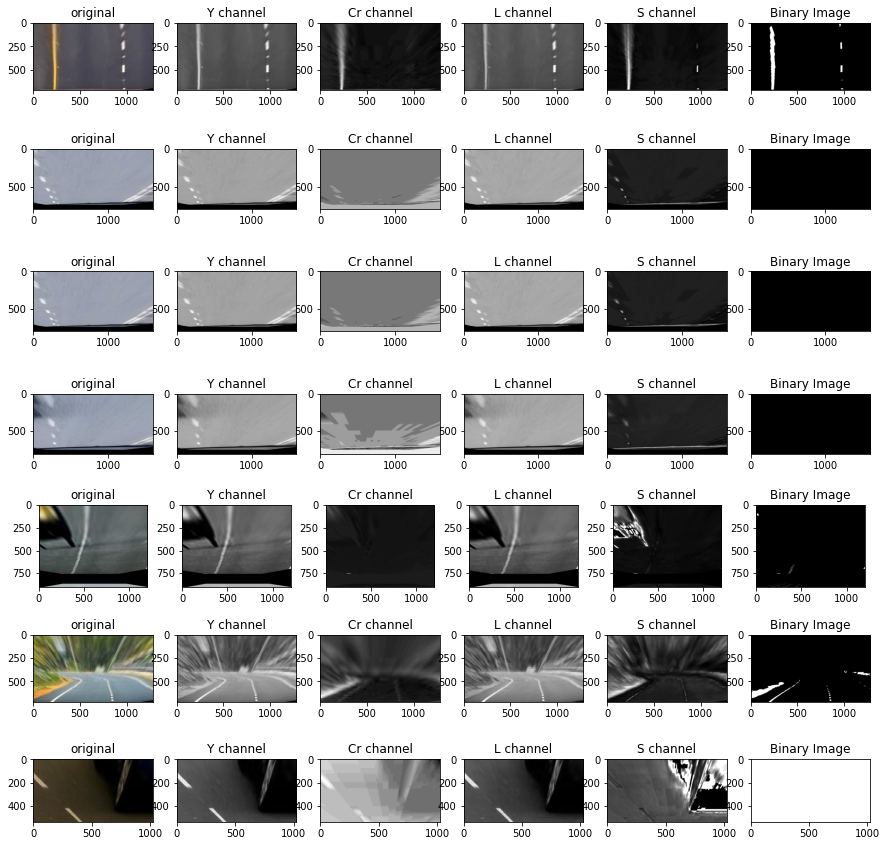

In [ ]:
f,axes= plt.subplots(len(Unwarped_images),6, figsize=(15,15))
f.subplots_adjust(hspace =0.5)
row=0

for image in Unwarped_images:
    imgY, imgCr, imgL, imgS= Custom_channel_converter(image)
    axes[row,0].imshow(image)
    axes[row,0].set_title('original')
    axes[row,1].imshow(imgY, cmap='gray')
    axes[row,1].set_title('Y channel')
    axes[row,2].imshow(imgCr, cmap='gray')
    axes[row,2].set_title('Cr channel')
    axes[row,3].imshow(imgL, cmap='gray')
    axes[row,3].set_title('L channel')
    axes[row,4].imshow(imgS, cmap='gray')
    axes[row,4].set_title('S channel')
    Ybinary= channelwise_thresholding(imgY,(215,255))
    Crbinary= channelwise_thresholding(imgCr,(215,255))
    Lbinary= channelwise_thresholding(imgL,(215,255))
    Sbinary= channelwise_thresholding(imgS,(215,255))
    combinedImage= np.zeros_like(Ybinary)
    combinedImage[(Crbinary==1)|(Ybinary==1)|((Lbinary==1)&(Sbinary==1))]=1
#     ((Sbinary==1)&(Hbinary==0))|(Crbinary==1)
    axes[row,5].imshow(combinedImage, cmap='gray')
    axes[row,5].set_title('Binary Image')
    row+=1


In [ ]:
def sobel_image(img, orient='x', thresh_min=0, thresh_max=255, convert=True):
    
    
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobel=None
    if(orient=='x'):
        sobel= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    else:
        sobel= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    sobel_abs= np.absolute(sobel)
    sobel_8bit= np.uint8(255* sobel_abs/np.max(sobel_abs))
    binary_output= np.zeros_like(sobel_8bit) 
    binary_output[(sobel_8bit>=thresh_min) & (thresh_max>=sobel_8bit)]=1
    
    return binary_output

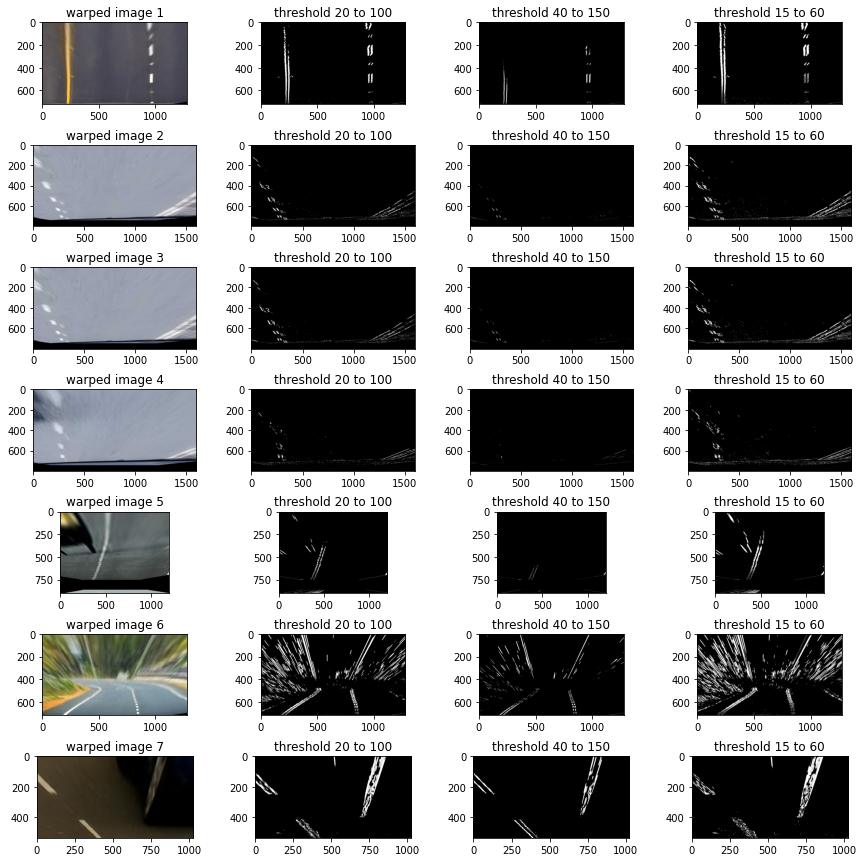

In [ ]:
threshVal= [(20,100),(40,150),(15,60)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,15))
f.subplots_adjust(hspace =0.5)
row=0
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
    #image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_applied_image1= sobel_image(image, 'x', threshVal[0][0], threshVal[0][1], True)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshVal[0][0])+' to '+str(threshVal[0][1]))
    sobel_applied_image2= sobel_image(image, 'x', threshVal[1][0], threshVal[1][1], True)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshVal[1][0])+' to '+str(threshVal[1][1]))
    sobel_applied_image3= sobel_image(image, 'x', threshVal[2][0], threshVal[2][1], True)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshVal[2][0])+' to '+str(threshVal[2][1]))
    row+=1



In [ ]:
def sobel_mag(img, thresh, convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    mag= (sobelx**2+ sobely**2)**(0.5)
    
    sobel_mag_8bit= np.uint8(255* mag/np.max(mag))
    binary_output= np.zeros_like(sobel_mag_8bit) 
    binary_output[(sobel_mag_8bit>=thresh[0]) & (thresh[1]>=sobel_mag_8bit)]=1
    
    return binary_output


In [ ]:
threshMag= [(15,60),(20,100),(40,150)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,15))
f.subplots_adjust(hspace =0.5)
row=0
convert=True
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
#     convert=False
#     image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_applied_image1= sobel_mag(image, threshMag[0],convert)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshMag[0][0])+' to '+str(threshMag[0][1]))
    sobel_applied_image2= sobel_mag(image,  threshMag[1],convert)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshMag[1][0])+' to '+str(threshMag[1][1]))
    sobel_applied_image3= sobel_mag(image,  threshMag[2],convert)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshMag[2][0])+' to '+str(threshMag[2][1]))
    row+=1


In [ ]:
def sobel_gradient_image(img, thresh=(0, np.pi/2), convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=15)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=15)
    
    abs_sobelx= np.absolute(sobelx)
    abs_sobely= np.absolute(sobely)
    
    grad= np.arctan2(abs_sobely, abs_sobelx)
    
    binary_output=np.zeros_like(grad)
    binary_output[(grad>thresh[0])&(grad<thresh[1])]=1
    return binary_output


In [ ]:
threshGrad= [(0.5,1.8),(0.7,1.3),(0.2,1.1)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,15))
f.subplots_adjust(hspace =0.5)  
row=0
convert=True
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
#     image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
#     convert=False
    sobel_applied_image1= sobel_gradient_image(image, threshGrad[0], convert)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshGrad[0][0])+' to '+str(threshGrad[0][1]))
    sobel_applied_image2= sobel_gradient_image(image,  threshGrad[1], convert)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshGrad[1][0])+' to '+str(threshGrad[1][1]))
    sobel_applied_image3= sobel_gradient_image(image,  threshGrad[2], convert)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshGrad[2][0])+' to '+str(threshGrad[2][1]))
    row+=1


In [ ]:
f,axes= plt.subplots(len(Unwarped_images),6, figsize=(15,15))
f.subplots_adjust(hspace =0.5)
row=0
convert=True
Processed_Image=[]
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
    
    #image= cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)[:,:,1]
    imgY, imgCr, imgb, imgS= Custom_channel_converter(image)
    
    Ybinary= channelwise_thresholding(imgY,(215,255))
    Crbinary= channelwise_thresholding(imgCr,(215,255))
    Lbinary= channelwise_thresholding(imgb,(215,255))
    Sbinary= channelwise_thresholding(imgS,(200,255))
    combined1 = np.zeros_like(imgY)
    
#     sobel_mag_image= sobel_mag(image_S_channel, (15,60), False)
    combined1[(Crbinary==1)|(Ybinary==1)|((Lbinary==1)&(Sbinary==1))]=1
    
    axes[row,1].imshow(combined1,cmap='gray')
    axes[row,1].set_title('Channels Combined')

    image_S_channel= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    convert=False

    sobel_image1= sobel_image(image_S_channel,'x', 15,60, convert)
    axes[row,2].imshow(sobel_image1,cmap='gray')
    axes[row,2].set_title('Sobel X')
#     sobel_grad_image= sobel_gradient_image(image, (0.3,2.0),convert)
    sobel_grad_image= sobel_gradient_image(image_S_channel,  (0.5,1.8), convert)
    axes[row,3].imshow(sobel_grad_image,cmap='gray')
    axes[row,3].set_title('Sobel Gradient')
    
    
    
    combined = np.zeros_like(sobel_image1)
#     combined[((sobel_image1 == 1) & (sobel_grad_image == 0))|(Schannel_binary==1)] = 1
    combined[(Crbinary==1)|(Ybinary==1)|((Lbinary==1)&(Sbinary==1))] = 1
    
    axes[row,4].imshow(combined,cmap='gray')
    axes[row,4].set_title('Binary Image')
    Processed_Image.append(combined)
    histogram = np.sum(combined[combined.shape[0]//2:,:], axis=0)
    axes[row,5].plot(histogram)
    axes[row,5].set_title('Pixel Position')  
    
    row+=1


In [ ]:
fit_prev_left=[]
fit_prev_right=[]
fit_sum_left=0
fit_sum_right=0
def Plot_line(binary_warped, smoothen=False,prevFrameCount=6 ): #used Udacity's code to plot the lines and windows over lanes 
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    lane_width= abs(rightx_base-leftx_base)
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if(smoothen):
        global fit_prev_left
        global fit_prev_right
        global fit_sum_left
        global fit_sum_right
        if(len(fit_prev_left)>prevFrameCount):
            fit_sum_left-= fit_prev_left.pop(0)
            fit_sum_right-= fit_prev_right.pop(0)

        fit_prev_left.append(left_fit)
        fit_prev_right.append(right_fit)
        fit_sum_left+=left_fit
        fit_sum_right+= right_fit

        no_of_fit_values=len(fit_prev_left) 
        left_fit= fit_sum_left/no_of_fit_values
        right_fit= fit_sum_right/no_of_fit_values
    
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    window_img = np.zeros_like(out_img)
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    return out_img, result, left_fitx,right_fitx,ploty,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width

          

In [ ]:
f,axes= plt.subplots(len(Unwarped_images),3, figsize=(30,30))
f.subplots_adjust(hspace =0.2, wspace=0.2)
row=0

for image in Processed_Image:
    global fit_prev_left
    global fit_prev_right
    global fit_sum_left
    global fit_sum_right
    fit_prev_left=[]
    fit_prev_right=[]
    fit_sum_left=0
    fit_sum_right=0
    axes[row,0].imshow(image,cmap='gray')
    axes[row,0].set_title('Combined Image'+str(row+1))
    

    out_img,out_img1, left_fitx,right_fitx,ploty,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width= Plot_line(image)
    axes[row,1].imshow(out_img)
    axes[row,1].plot(left_fitx, ploty, color='yellow')
    axes[row,1].plot(right_fitx, ploty, color='yellow')
    axes[row,1].set_title('Fitting Line')
    
    axes[row,2].imshow(out_img1)
    axes[row,2].plot(left_fitx, ploty, color='yellow')
    axes[row,2].plot(right_fitx, ploty, color='yellow')
    axes[row,2].set_title("Lanes detected")
    
    row+=1

In [ ]:
def draw_lane(original_img, Combined_img, left_fitx, right_fitx, M):
    new_img = np.copy(original_img)

    warp_zero = np.zeros_like(Combined_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = Combined_img.shape
    ploty = np.linspace(0, h-1, num=h)

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(255,0,0), thickness=15)

    return color_warp, new_img

In [ ]:
center_distances= Queue(maxsize=15)
distanceSum=0
def get_car_position(l_fit, r_fit,w,h):
    xm_per_pix=3.7/700
    center_dist=0
    lane_center_position=0
    if r_fit is not None and l_fit is not None:
        car_position = w/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    
    global distanceSum           
    if(center_distances.full()):
        el=center_distances.get()
        distanceSum-=el
    
    center_distances.put(center_dist)
    distanceSum+=center_dist
    
    no_of_distance_values=center_distances.qsize() 
    center_dist= distanceSum/no_of_distance_values
    return center_dist,lane_center_position

In [ ]:
def get_direction(center_dist):
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    return direction

In [ ]:
def Plot_details(laneImage,curv_rad,center_dist,width_lane,lane_center_position):
    offest_top=0
    copy= np.zeros_like(laneImage)
    
    h = laneImage.shape[0]
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(laneImage, text, (40,70+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(copy, text, (40,100+offest_top), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    abs_center_dist = abs(center_dist)
    direction= get_direction(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
#     cv2.putText(laneImage, 'steering '+direction, (40,110+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(laneImage, '|', (640,710), font, 2.0, (255,255,255), 3, cv2.LINE_AA)
    cv2.putText(laneImage, '|', (int(lane_center_position),680), font, 2.0, (255,0,0), 3, cv2.LINE_AA)
    cv2.putText(laneImage, text, (40,120+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    
    text = 'Lane Width: ' + '{:04.2f}'.format(width_lane) + 'm'
    cv2.putText(laneImage, text, (40,170+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(copy, text, (40,280+offest_top), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    return laneImage, copy


In [ ]:
width_lane_avg=[]
radius_values = Queue(maxsize=15)
radius_sum=0

def calc_radius_position(combined, l_fit, r_fit, l_lane_inds, r_lane_inds,lane_width):
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_curverad, right_curverad, center_dist, width_lane = (0, 0, 0, 0)
    h = combined.shape[0]
    w = combined.shape[1]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = combined.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        
        #applying the formula for 
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        
        width_lane= lane_width*xm_per_pix
        if(len(width_lane_avg) != 0):
            avg_width=(sum(width_lane_avg)/len(width_lane_avg))
            if abs(avg_width-width_lane)<0.5:
                width_lane_avg.append(width_lane)
            else:
                width_lane=avg_width
    
    
    # Averaging radius value over past 15 frames
    global radius_sum           
    if(radius_values.full()):
        el=radius_values.get()
        
        radius_sum-=el
    curve_radius= (left_curverad+right_curverad)/2
    radius_values.put(curve_radius)
    radius_sum+=curve_radius
    
    no_of_radius_values=radius_values.qsize() 
    curve_radius= radius_sum/no_of_radius_values
#     print(curve_radius, radius_sum,no_of_radius_values)
    
    center_dist,lane_center_position= get_car_position(l_fit,r_fit,w,h) #getting the car distance from the center
    return curve_radius, center_dist,width_lane,lane_center_position


In [ ]:
def Lane_pipeline(img,smoothen,prevFrameCount):
    undistorted_image= undistort(img)
    warped_image,M= warp_image(undistorted_image)
    image_S_channel= cv2.cvtColor(warped_image, cv2.COLOR_RGB2HLS)[:,:,2]
    
    imgY, imgCr, imgb, imgS= Custom_channel_converter(warped_image)
    
    Ybinary= channelwise_thresholding(imgY,(215,255))
    Crbinary= channelwise_thresholding(imgCr,(215,255))
    Lbinary= channelwise_thresholding(imgb,(215,255))
    Sbinary= channelwise_thresholding(imgS,(200,255))
    combined = np.zeros_like(imgY)
    
#     sobel_mag_image= sobel_mag(image_S_channel, (15,60), False)
    sobel_image1= sobel_image(image_S_channel,'x', 15,60, False)
    sobel_grad_image= sobel_gradient_image(image_S_channel,  (0.5,1.8), False)
    combined[(Crbinary==1)|(Ybinary==1)|((Lbinary==1)&(Sbinary==1))] = 1
#     |((sobel_image1==1) & (sobel_grad_image==1))
#     plt.imshow(combined)
#     combined[]=1
    
#     |((sobel_image1==1)&(sobel_grad_image==1))
#     ((sobel_mag_image == 1) & (sobel_grad_image == 0))
    
#     out_img,out_img1, left_fitx,right_fitx,ploty,left_curverad,right_curverad,center_dist= Plot_line(combined)
    out_img,out_img1, left_fitx,right_fitx,ploty,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width= Plot_line(combined,smoothen,prevFrameCount)
    curverad,center_dist,width_lane,lane_center_position= calc_radius_position(combined,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width)
    laneImage,new_img =draw_lane(img, combined, left_fitx, right_fitx, M)
    unwarped_image= reverse_warping(laneImage,M)
    laneImage = cv2.addWeighted(new_img, 1, unwarped_image, 0.5, 0)
    laneImage, copy = Plot_details(laneImage,curverad,center_dist,width_lane,lane_center_position)
    return img,out_img,out_img1,unwarped_image,laneImage,combined,copy


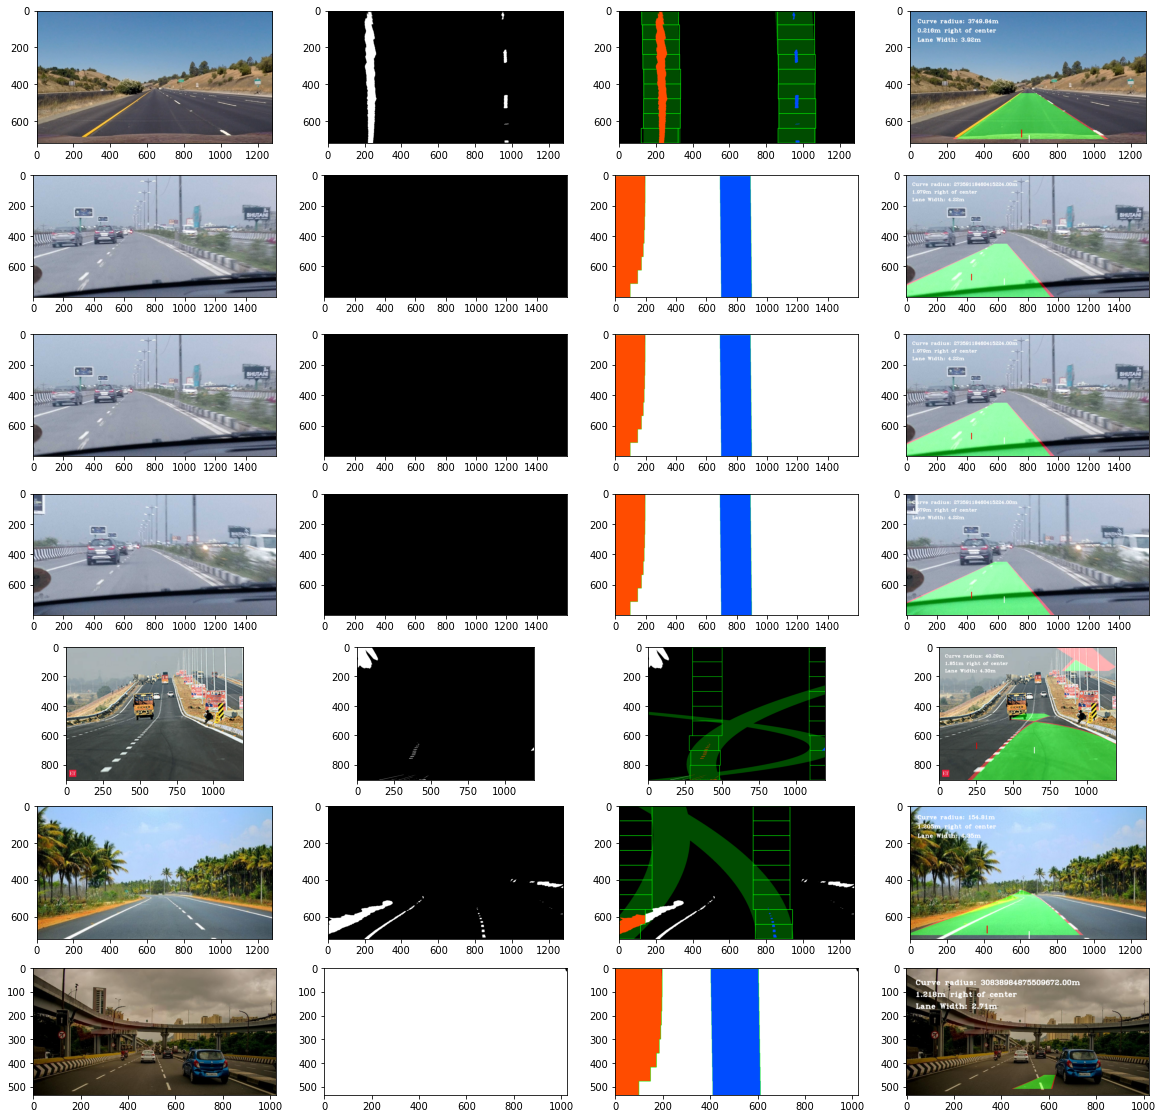

In [ ]:
f,axes= plt.subplots(7,4, figsize=(20,20))
row=0

for index in range(7):
    global fit_prev_left
    global fit_prev_right
    global fit_sum_left
    global fit_sum_right
    global radius_sum
    global radius_values
    global center_distances
    global distanceSum
    fit_prev_left=[]
    fit_prev_right=[]
    fit_sum_left=0
    fit_sum_right=0
    radius_sum=0
    radius_values.queue.clear()
    center_distances.queue.clear()
    distanceSum=0
    
    image= test_images[index]
    image= ConvertBGRtoRGB(image)
    rgb_image,out_img,out_img1,unwarped_image,laneImage,combined,copy= Lane_pipeline(image, False,0)
    
    axes[row,0].imshow(rgb_image)
    axes[row,1].imshow(combined, cmap='gray')
    axes[row,2].imshow(out_img1)
    axes[row,3].imshow(laneImage)
    row+=1
